In [1]:
source("../../utils.R")
devtools::load_all("~/public/SiyuanLuo/projects/clustering_metrics/ClusteringMetrics")
library(Seurat)

ℹ Loading ClusteringMetrics
Registered S3 method overwritten by 'e1071':
  method       from  
  print.fclust fclust

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘Seurat’


The following object is masked from ‘package:igraph’:

    components




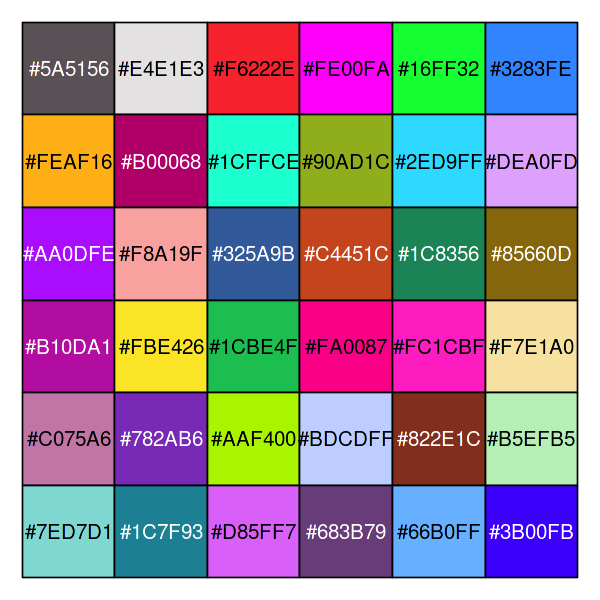

In [2]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(1,1))

show_col(my_col_polychrome)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


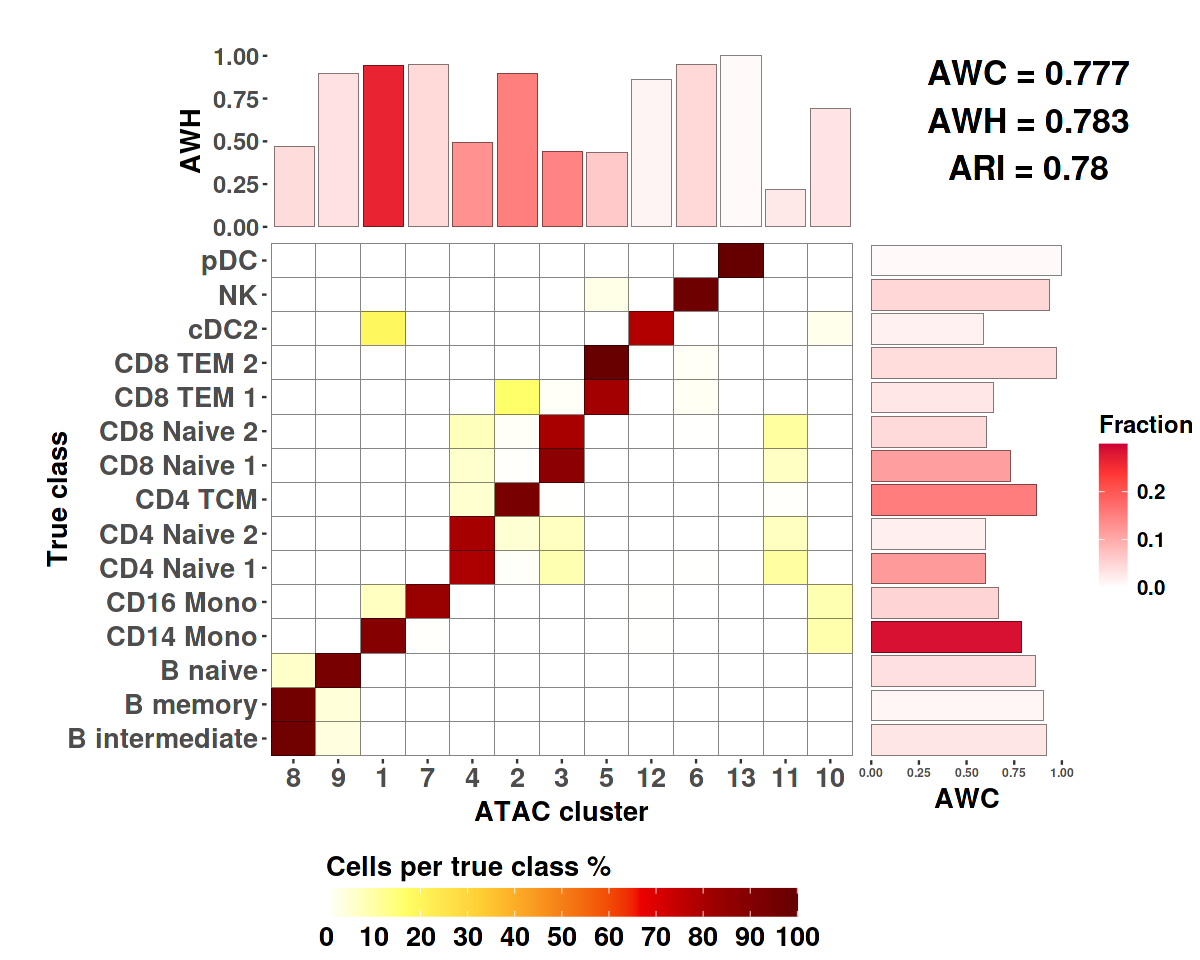

In [3]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

ground_truth_file <- '../../partition_real_life_examples/PBMC_ground_truth.tsv'
clustering_file <- '../../PWC/PBMC_aggregation_ndim15_seed0_r0.35.tsv'

df_label <- read.table(clustering_file, header = T, sep="\t", comment.char = "")
df_ground_truth <- read.table(ground_truth_file, header = T, sep="\t", comment.char = "")

df <- merge(df_label, df_ground_truth, by="barcode")
ground_truth <- as.factor(df$ground_truth)
clusterings <- as.factor(df$clusterings)

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=3.8, c=3.1, m=0, n=0.3)
p2

In [4]:
embed <- read.table("../../PWC/PBMC_aggregation_ndim15_embeding.tsv", header = T, sep="\t", comment.char = "")
embed <- embed[df$barcode,]

In [5]:
class(embed)

[1] "data.frame"

In [6]:
df_pwc <- data.frame(class=c(), PWC=c(), k=c())
for(k in c(5, 10, 15, 20, 25, 30)){
    res <- getGraphClassMetrics(embed, labels = ground_truth, metrics=c("PWC"), k=k, directed = TRUE, shared=TRUE)
    res$k <- k
    df_pwc <- rbind(df_pwc, res)
}

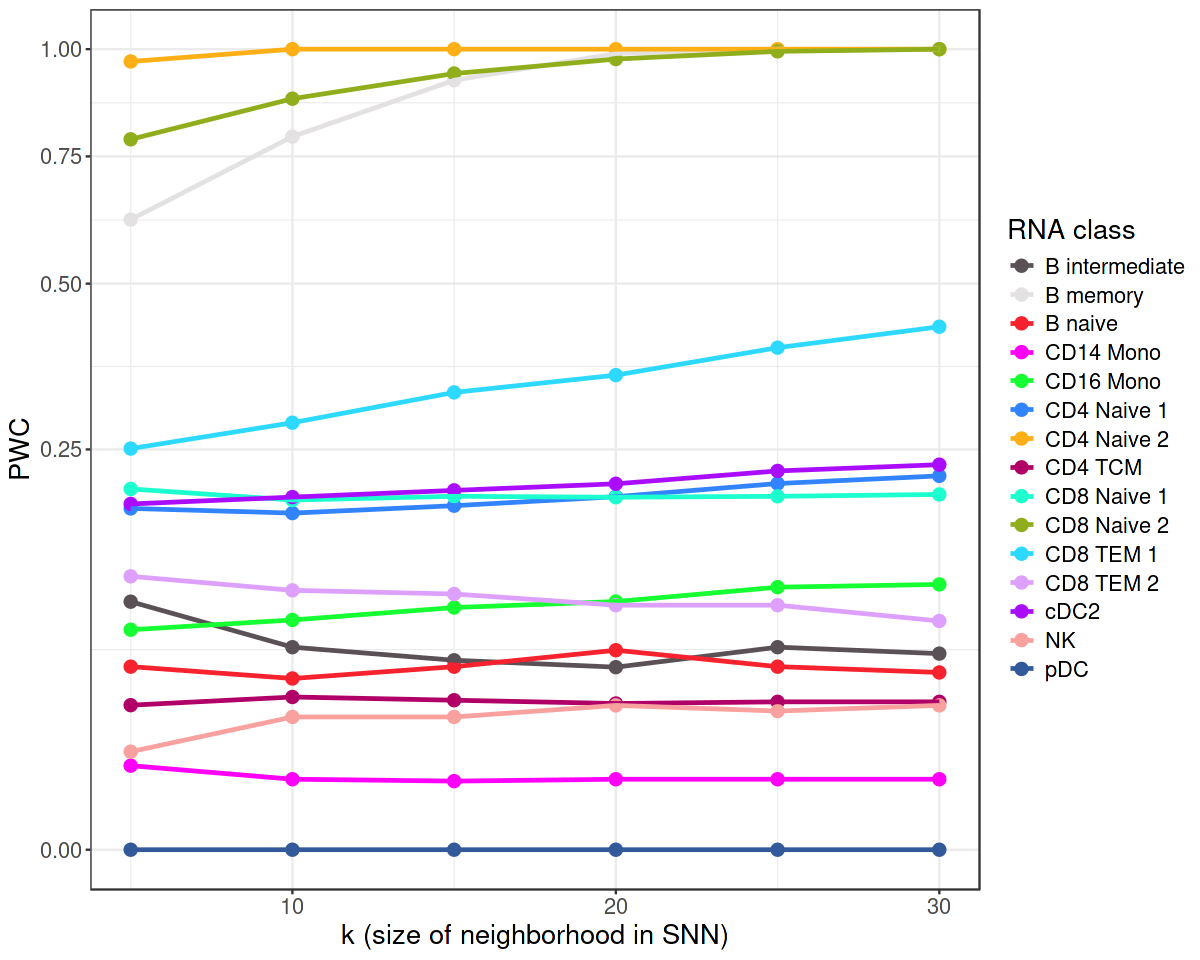

In [7]:
p1 <- df_pwc %>% ggplot(aes(x=k, y=PWC, color=class)) + 
geom_point(size=3) + 
geom_line(size=1) +
theme_bw() +
labs(x="k (size of neighborhood in SNN)", y="PWC", color="RNA class") +
scale_color_manual(values=my_col_polychrome) +
scale_y_sqrt() +
theme(text = element_text(size = 16))
p1

In [ ]:
sobj_file <- "../../PWC/PBMC_aggregation_ndim15_sobj_SNN.RDS"
sobj <- readRDS(sobj_file)

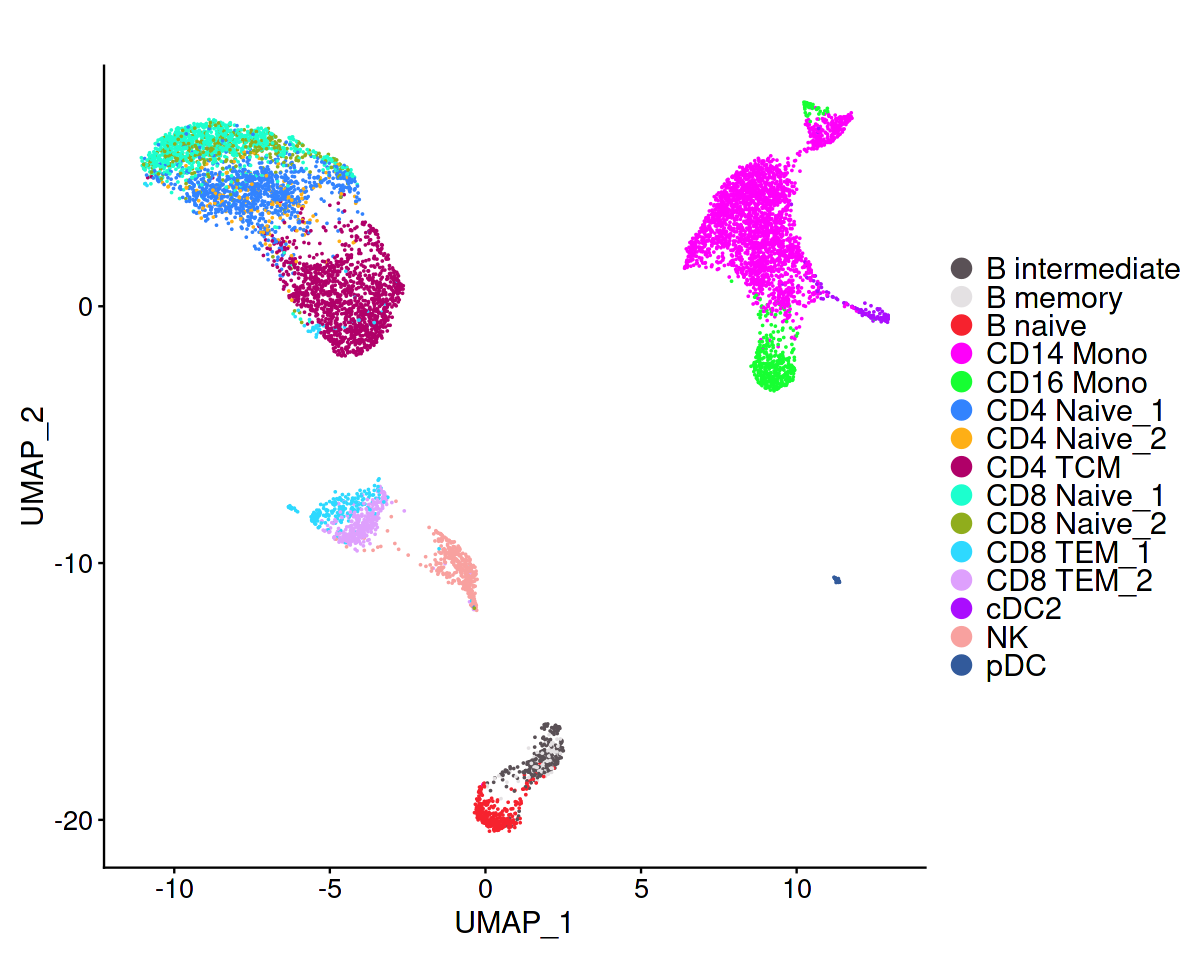

In [14]:
p3 <- DimPlot(sobj, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome", pt.size=0.001)  +
    theme(text=element_text(size=18), 
        legend.text = element_text(size = 18),
        axis.text = element_text(size = 16)) + ggtitle("") +
guides(color = guide_legend(override.aes = list(size = 5)))

p3

In [9]:
svg("pwc_k.svg", width=7, height=5)
plot(p1)
dev.off() 

png 
  2

In [10]:
svg("agg_PBMC_cross_table.svg", width=9, height=8)
plot(p2)
dev.off() 

png 
  2

In [17]:
svg("agg_PBMC_UMAP.svg", width=7, height=5)
plot(p3)
dev.off() 

png 
  2